In [1]:
import pandas as pd
from random_forests import *
df = pd.read_csv("full_data.csv")

# Raw Data

In [2]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Pre-processing 
Discussed in the Project Proposal

In [ ]:
def standard_preprocessing(df):
    # Remove unknown smokers
    df = df[df['smoking_status'] != 'Unknown']
    # Bin Ages
    df['age'] = pd.cut(df["age"], bins=[0, 18, 30, 50, 65, 82])

    return df

# Encoding for Categorical Variables
Target encoding -> Setting the category value to it's association with success

One-hot encoding -> Creating binary values for each category within a categorical variable

Target encoding saw improved results for this dataset, so it was used instead

In [ ]:
# One-hot Encoding
def one_hot_encode(df, name):
    df[[x + '_' + name for x in df[name].unique()]] = [[1 if x == y else 0 for x in df[name].unique()] for y in df[name]]
    df = df.drop(name, axis=1)

# Target Encoding
def target_encode(df, name):
    dfe = df.groupby(name)[['stroke']].sum().rename(columns={"stroke":"Target 1"})
    dfe["Target 0"] = df[df["stroke"] == 0].size - dfe["Target 1"]
    dfe["Probability"] = dfe["Target 1"] / dfe["Target 0"]
    df[name] = df[name].map(dfe["Probability"].to_dict())
    return df

# Process Data

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def rf_preprocessing(df):
    # Ordinal Encoding
    df['smoking_status'] = df['smoking_status'].map({'never smoked':0 , 'formerly smoked':0.5, 'smokes':1})
    df['age'] = df['age'].map({x:(y/df['age'].unique().size) for x,y in zip(df['age'].unique(), range(df['age'].unique().size))})
    df = df[df['age'] != 0]

    # One-Hot Encoding
    for x in ["Residence_type", "work_type"]:
        target_encode(df, x)

    # Setting Binary values to numerical values
    df['gender'] = [int(x == 'Male') for x in df['gender']]
    df['ever_married'] = [int(x == 'Yes') for x in df['ever_married']]

    # Standard Scaling Data
    df['age'] = StandardScaler().fit_transform([[x] for x in df['age']])
    df['bmi'] = StandardScaler().fit_transform([[x] for x in df['bmi']])
    df['avg_glucose_level'] = StandardScaler().fit_transform([[x] for x in df['avg_glucose_level']])
    df['gender'] = StandardScaler().fit_transform([[x] for x in df['gender']])
    df['ever_married'] = StandardScaler().fit_transform([[x] for x in df['ever_married']])

    return df

df = pd.read_csv("full_data.csv")

df = standard_preprocessing(df)
df = rf_preprocessing(df)

C:\Users\Ewen\AppData\Local\Temp\ipykernel_9400\1985500653.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.cut(df["age"], bins=[0, 18, 30, 50, 65, 82])
C:\Users\Ewen\AppData\Local\Temp\ipykernel_9400\4315324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map({'never smoked':0 , 'formerly smoked':0.5, 'smokes':1})
C:\Users\Ewen\AppData\Local\Temp\ipykernel_9400\4315324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

# Processed Data

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,-0.804824,-0.990060,0,0,0.626063,0.001699,0.001387,1.583182,0.685791,1.0,1
9,-0.804824,0.083533,0,1,0.626063,0.000381,0.001144,0.390907,1.055064,1.0,1
10,-0.804824,0.083533,0,0,0.626063,0.001699,0.001387,0.016340,-0.406642,1.0,1
12,-0.804824,-0.990060,1,0,0.626063,0.000450,0.001144,1.493474,0.147268,0.0,1
13,1.242508,0.083533,0,1,0.626063,0.001699,0.001387,2.061783,1.162769,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4975,1.242508,-0.990060,0,0,-1.597284,0.001699,0.001387,2.612714,0.424223,1.0,0
4976,1.242508,-0.990060,0,0,-1.597284,0.001699,0.001144,-0.790565,-0.021982,0.5,0
4977,1.242508,-0.990060,0,0,0.626063,0.001699,0.001387,2.050981,0.178041,1.0,0
4978,-0.804824,-0.990060,1,0,0.626063,0.000381,0.001144,-0.206522,0.285745,1.0,0


# Create Train-test Split

In [5]:
from sklearn.model_selection  import train_test_split

X, Y = df.drop("stroke", axis=1).to_numpy(), df["stroke"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Metrics
Calculate F1, Recall, Precision and Accuracy

In [14]:
def metrics(model, x_test, y_test, out=True):
    TP, TN, FP, FN = 0, 0, 0, 0

    y_pred = model.predict(x_test)
    for y, y_p in zip(y_test, y_pred):
        if y == 0:
            if y_p == 0:
                TN += 1
            else:
                FN += 1
        else:
            if y_p == 0:
                FP += 1
            else:
                TP += 1
    if (TP + FP) > 0:
        precision = TP / (TP + FP)
    else:
        if FP == 0:
            precision = 1
        else:
            precision = 0

    if (TP + FN) > 0:
        recall = TP / (TP + FN)
    else:
        if FN == 0:
            recall = 1
        else:
            recall = 0
    
    accuracy = (TP + TN) / (FN + FP + TP + TN)
    try:
        F1 = (2*TP)/(2*TP + FP + FN)
    except:
        F1 = 0

    if (out):
        print("Precision:", precision)
        print("Recall:", recall)
        print("Accuracy:", accuracy)
        print("F1:", F1)
        print('TP',TP, 'TN', TN, 'FP', FP, 'FN', FN)

    return {"Precision": precision,
            "Recall": recall,
            "Accuracy": accuracy,
            "F1": F1,
            'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Self-implemented Model

In [6]:
from random_forests import random_Forest_Classifier
import random

rfC = random_Forest_Classifier(max_depth=35, max_features=3, min_samples_split=2, n_estimators=15)
rfC.fit(X_train, y_train)
metric = metrics(rfC, X_test, y_test)

OOB estimate: 0.43
Precision: 0.0
Recall: 0.0
Accuracy: 0.687037037037037
F1: 0.0
TP 0 TN 371 FP 22 FN 147


# SKLearn Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

Sk_rfC = RandomForestClassifier(n_estimators=15, max_features=3, verbose=1, max_depth=35)
Sk_rfC = Sk_rfC.fit(X_train, y_train)
metric = metrics(Sk_rfC, X_test, y_test)

Precision: 0.014084507042253521
Recall: 0.05555555555555555
Accuracy: 0.9671201814058957
F1: 0.02247191011235955
TP 1 TN 2558 FP 70 FN 17


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


# XGBoost Model

In [25]:
import xgboost

xgb = xgboost.XGBClassifier(n_estimators=15, max_depth=35)
xgb = xgb.fit(X_train, y_train)
metric = metrics(xgb, X_test, y_test)

Precision: 0.0
Recall: 1
Accuracy: 0.973167044595616
F1: 0.0
TP 0 TN 2575 FP 71 FN 0


# Test results

In [28]:
per_rf = []
acc_rf = []
re_rf = []
f1_rf = []

per_skrf = []
acc_skrf = []
re_skrf = []
f1_skrf = []

per_xg = []
acc_xg = []
re_xg = []
f1_xg = []

# Metrics {"Precision:": precision,
#             "Recall:": recall,
#             "Accuracy:": accuracy,
#             "F1:": F1,
#             'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

for i in range(1, 99):    
    X, Y = df.drop("stroke", axis=1).to_numpy(), df["stroke"].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i/100)

    Sk_rfC = RandomForestClassifier(n_estimators=15, max_features=3, max_depth=35)
    Sk_rfC = Sk_rfC.fit(X_train, y_train)
    
    metric = metrics(Sk_rfC, X_train, y_train, out=False)

    per_skrf.append(metric['Precision'])
    acc_skrf.append(metric['Accuracy'])
    re_skrf.append(metric['Recall'])
    f1_skrf.append(metric['F1'])

    xgb = xgboost.XGBClassifier(n_estimators=15, max_depth=35)
    xgb = xgb.fit(X_train, y_train)
    metric = metrics(xgb, X_test, y_test, out=False)

    per_xg.append(metric['Precision'])
    acc_xg.append(metric['Accuracy'])
    re_xg.append(metric['Recall'])
    f1_xg.append(metric['F1'])

    # per.append(metric['Precision'])
    # acc.append(metric['Accuracy'])
    # re.append(metric['Recall'])
    # f1.append(metric['F1'])
        

Precision: 1
Recall: 1
Accuracy: 1.0
F1: 0
TP 0 TN 27 FP 0 FN 0
Precision: 0.0
Recall: 1
Accuracy: 0.9629629629629629
F1: 0.0
TP 0 TN 52 FP 2 FN 0
Precision: 0.0
Recall: 1
Accuracy: 0.9753086419753086
F1: 0.0
TP 0 TN 79 FP 2 FN 0
Precision: 0.0
Recall: 1
Accuracy: 0.9907407407407407
F1: 0.0
TP 0 TN 107 FP 1 FN 0
Precision: 0.0
Recall: 1
Accuracy: 0.9777777777777777
F1: 0.0
TP 0 TN 132 FP 3 FN 0
Precision: 0.0
Recall: 0.0
Accuracy: 0.9691358024691358
F1: 0.0
TP 0 TN 157 FP 4 FN 1
Precision: 0.0
Recall: 0.0
Accuracy: 0.9576719576719577
F1: 0.0
TP 0 TN 181 FP 7 FN 1
Precision: 0.0
Recall: 1
Accuracy: 0.9583333333333334
F1: 0.0
TP 0 TN 207 FP 9 FN 0
Precision: 0.0
Recall: 1
Accuracy: 0.9711934156378601
F1: 0.0
TP 0 TN 236 FP 7 FN 0
Precision: 0.0
Recall: 0.0
Accuracy: 0.9703703703703703
F1: 0.0
TP 0 TN 262 FP 6 FN 2
Precision: 0.125
Recall: 1.0
Accuracy: 0.9764309764309764
F1: 0.2222222222222222
TP 1 TN 289 FP 7 FN 0
Precision: 0.1
Recall: 1.0
Accuracy: 0.9722222222222222
F1: 0.18181818181

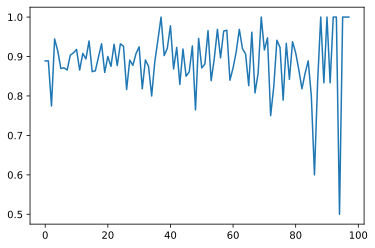

In [27]:
import matplotlib.pyplot as plt

plt.plot(per)